In [ ]:
#default_exp datablock

# DataBlock

> process timeseries datasets with DataBloc

In [ ]:
#export
from torchtools.data import *
from torchtools.datasets import *

from torchtools.augmentations import *

from torchtools.models import *
from torchtools.core import *

In [ ]:
#export
from fastai2.data.all import *
from fastai2.basics import *

In [ ]:
#export
import pandas as pd
import numpy as np
from functools import partial

In [ ]:
_verbose=True

Using the standard fastai v2 Datablock API:
- provides all fastai v2 functionality
- seems to be significantly slower than using e.g. tsai NumpyDataLoader
- can be tweaked maybe?

### Get Data

In [ ]:
df_main = pd.read_csv('./data/custom/bi_sample_anon.csv', nrows=200000)

In [ ]:
## simple config
# standard config with all continuous xs and y
x_cols = [[f'x{i}_{j}' for j in range(10)] for i in range(6)]
dep = 'y0'
n_train = 8000

items is a list of (x,y) tuples  
methods called when passing items to DataBlock:
- DataBlock.datasets(items, ....)
- Dataset(items, ...)
- TfmdList(items, ...)
- L(items, ...)
- CollBase.__init__(items, ...)



`df_to_items` and `df_to_items_discrete`:
- fill in the nans
- zip together `(x,y)` resp. `(x_cont, x_dis, y)`
- return n_train for convenience, needed to split up data sometimes, e.g. for the ucr data
- list of tuples

Not ideal that some function names are used in different steps in similar, but not identical ways

Define inputs for DataBlock, we need:
- get_items: source to items
- get_x, get_y or getters: 
- blocks: provide type_tfms for the inputs basically
- splitter:

In [ ]:
def items_to_list(items):
    '''convert list of tuples to list of lists'''
    return list(map(list, items))

In [ ]:
items, _ = df_to_items(df_main, x_cols, dep, n_train)
items_l = items_to_list(items)
assert isinstance(items_l[0], list)

(200000, 6, 10)


In [ ]:
def get_items(df_main):
    '''
    get_items to be used with all continuous datablock
    '''
    return items_to_list(df_to_items(df_main, x_cols, dep, n_train)[0])

In [ ]:
# all-cont getters
def get_x(x):
    pv(f'get_x item {x}', verbose=_verbose)
    return x[0]
def get_y(x):
    pv(f'get_y item {x}', verbose=_verbose)
    return x[1]

In [ ]:
dblock = DataBlock(get_items=get_items, get_x=get_x, get_y=get_y, batch_tfms=RandAugment())

tfms None


In [ ]:
#cuda
dblock.summary(df_main)

Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.636364  -10.526316   
...                     ...   ...         ...         ...         ...   
199995  2018-09-15 19:00:00  4.58   27.932961  101.010101  100.000000   
199996  2018-09-15 19:00:00  1.55  181.818182   97.087379  -41.152263   
199997  2018-09-15 19:00:00  7.48   15.432099  114.942529  -38.167939   
199998  2018-09-15 19:00:00  2.96   51.020408  103.092784  -54.644809   
199999  2018-09-15 19:00:00  2.90   52.631579  107.526882  100.000000   

              x0_1        x0_2        x0_3        x0_4        x0_5  ...  x5_2  \
0       100.000000   -6.497726  -24.509804  -33.222591  -42.735043  ...   0.0 

get_x item [array([[ 100.      ,  100.      ,  100.      ,  100.      ,  100.      ,
         -41.666668,  100.      ,  -84.745766,  -35.971222,  100.      ],
       [   0.      ,  100.      ,  100.      ,  100.      ,   50.      ,
        -111.111115,  100.      , -120.481926, -128.20512 ,  100.      ],
       [   1.      ,    2.      ,    2.      ,    1.      ,    1.      ,
          -4.      ,    1.      ,   -2.      ,   -1.      ,    1.      ],
       [ 100.      ,  -38.314175,  100.      ,  -58.139534,  -68.49315 ,
         100.      , -107.52688 ,  100.      ,  100.      ,  -30.959753],
       [ 100.      , -106.38298 ,  100.      ,    0.      , -131.57895 ,
         100.      ,  -92.59259 ,  100.      ,  100.      ,  100.      ],
       [   2.      ,   -3.      ,    1.      ,    0.      ,   -1.      ,
           1.      ,    0.      ,    3.      ,    4.      ,    0.      ]],
      dtype=float32), -42.01680672268776]
get_y item [array([[ 100.      ,  100.      ,  100.      ,  100

get_x item [array([[ -21.186441,  -49.019608,  100.      ,  -66.22517 ,  -20.964361,
         -68.027214,  -31.152649, -100.      ,  -19.801981,  100.      ],
       [ 100.      ,    0.      ,  100.      , -133.33333 ,  100.      ,
         -45.87156 ,  100.      , -100.      ,  -90.90909 ,  100.      ],
       [   0.      ,    0.      ,    1.      ,   -2.      ,    0.      ,
           0.      ,    0.      ,    0.      ,   -3.      ,    1.      ],
       [ 100.      ,  100.      ,  -52.083332,  100.      ,  100.      ,
         -74.07407 ,  100.      ,  -67.1141  , -113.63636 ,  100.      ],
       [ 100.      ,  100.      ,    0.      ,    0.      ,  100.      ,
         -47.61905 ,  100.      ,  -45.045044, -113.63636 ,  100.      ],
       [   1.      ,    5.      ,    0.      ,    1.      ,    2.      ,
           0.      ,    2.      ,    0.      ,    0.      ,    1.      ]],
      dtype=float32), 100.0]
get_y item [array([[ -21.186441,  -49.019608,  100.      ,  -66.22517 ,  -20

#### Blocks with TS type_tfms

In [ ]:
class ToTSTensor(Transform):
    def encodes(self, x):
        pv('ToTSTensor', _verbose)
        return TSTensor(x)

In [ ]:
#export
#added squeeze
#should be in data or core
class TensorFloat(TensorBase):
    '''
    float target value of a timeseries
    ctx expected to be a `axes` object
    '''
    _show_args={}
#     def show(self, ctx=None, **kwargs):
#         if 'figsize' in kwargs: del kwargs['figsize']
#         ctx.suptitle(f'Label: {self.numpy()}', fontsize=16) ## ctx fig
#         return ctx
    
    def show(self, ctx=None, **kwargs):
        if 'figsize' in kwargs: del kwargs['figsize']
        assert ctx is not None; 'cannot show a label without ctx'
        ctx.set_title(f'Label: {self.squeeze().numpy():.2f}', fontsize=16) ## ctx axes object
        return ctx

In [ ]:
class ToFloatTensor(Transform):
    def encodes(self, x):
        pv('ToFloatTensor', _verbose)
        return TensorFloat(L(x))

In [ ]:
def TSBlock():
    return TransformBlock(type_tfms=ToTSTensor)

def FloatBlock():
    return TransformBlock(type_tfms=ToFloatTensor)

In [ ]:
#hide
## this is the dataframe version
class NormalizeTS(Normalize):
    def __init__(self, mean=None, std=None, axes=(0,2), ts_names=None): 
        super().__init__(mean=mean, std=std, axes=axes)
        self.ts_names = ts_names
        self.n_channels = len(self.ts_names)
        self.device = default_device()
    
    def setups(self, x):
        self.means = [np.nanmean(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
        self.stds = [np.nanstd(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
        self.means = tensor(self.means)[None,:,None].to(self.device)
        self.stds = tensor(self.stds)[None,:,None].to(self.device)

In [ ]:
@Normalize
def encodes(self, x:TSTensor):
    print('encodes')
    x = (x-self.mean)/self.std
    return x
    
@Normalize
def setups(self, dl:DataLoader):
    if self.mean is None or self.std is None:
        xs = torch.tensor(np.stack(L(dl.items).itemgot(0)))
        print('setups')
        print(xs.shape)
        self.mean, self.std = xs.mean(self.axes, keepdim=True), xs.std(self.axes, keepdim=True)+1e-7

In [ ]:
%%time
dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, get_x=get_x, 
                   get_y=get_y, 
                   batch_tfms=Normalize(axes=(0,2)), 
                   splitter=RandomSplitter())
# dblock = DataBlock(blocks=(TSBlock, TransformBlock), get_items=get_items, get_x=get_x, get_y=get_y)

CPU times: user 884 µs, sys: 64 µs, total: 948 µs
Wall time: 955 µs


In [ ]:
#cuda
dblock.summary(df_main)

Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.636364  -10.526316   
...                     ...   ...         ...         ...         ...   
199995  2018-09-15 19:00:00  4.58   27.932961  101.010101  100.000000   
199996  2018-09-15 19:00:00  1.55  181.818182   97.087379  -41.152263   
199997  2018-09-15 19:00:00  7.48   15.432099  114.942529  -38.167939   
199998  2018-09-15 19:00:00  2.96   51.020408  103.092784  -54.644809   
199999  2018-09-15 19:00:00  2.90   52.631579  107.526882  100.000000   

              x0_1        x0_2        x0_3        x0_4        x0_5  ...  x5_2  \
0       100.000000   -6.497726  -24.509804  -33.222591  -42.735043  ...   0.0 

  Pipeline: get_y -> ToFloatTensor
    starting from
      [[[ 1.0000000e+02 -1.2868776e+00 -1.2868776e+00 -1.2868776e+00
  -1.2868776e+00 -1.2868776e+00 -1.2868776e+00 -1.2868776e+00
  -1.2868776e+00 -1.2868776e+00]
 [ 0.0000000e+00 -7.2602588e-01 -7.2602588e-01 -7.2602588e-01
  -7.2602588e-01 -7.2602588e-01 -7.2602588e-01 -7.2602588e-01
  -7.2602588e-01 -7.2602588e-01]
 [ 3.0000000e+00  1.0219784e-02  1.0219784e-02  1.0219784e-02
   1.0219784e-02  1.0219784e-02  1.0219784e-02  1.0219784e-02
   1.0219784e-02  1.0219784e-02]
 [-4.8543690e+01 -1.7377727e+00 -1.7377727e+00 -1.7377727e+00
  -1.7377727e+00 -1.7377727e+00 -1.7377727e+00 -1.7377727e+00
  -1.7377727e+00 -1.7377727e+00]
 [ 0.0000000e+00 -1.0197207e+00 -1.0197207e+00 -1.0197207e+00
  -1.0197207e+00 -1.0197207e+00 -1.0197207e+00 -1.0197207e+00
  -1.0197207e+00 -1.0197207e+00]
 [-1.0000000e+00 -1.0627943e-02 -1.0627943e-02 -1.0627943e-02
  -1.0627943e-02 -1.0627943e-02 -1.0627943e-02 -1.0627943e-02
  -1.0627943e-02 -1.0627943e-02

get_x item [array([[ 1.0000000e+02, -1.2868776e+00, -1.2868776e+00, -1.2868776e+00,
        -1.2868776e+00, -1.2868776e+00, -1.2868776e+00, -1.2868776e+00,
        -1.2868776e+00, -1.2868776e+00],
       [ 0.0000000e+00, -7.2602588e-01, -7.2602588e-01, -7.2602588e-01,
        -7.2602588e-01, -7.2602588e-01, -7.2602588e-01, -7.2602588e-01,
        -7.2602588e-01, -7.2602588e-01],
       [ 3.0000000e+00,  1.0219784e-02,  1.0219784e-02,  1.0219784e-02,
         1.0219784e-02,  1.0219784e-02,  1.0219784e-02,  1.0219784e-02,
         1.0219784e-02,  1.0219784e-02],
       [-4.8543690e+01, -1.7377727e+00, -1.7377727e+00, -1.7377727e+00,
        -1.7377727e+00, -1.7377727e+00, -1.7377727e+00, -1.7377727e+00,
        -1.7377727e+00, -1.7377727e+00],
       [ 0.0000000e+00, -1.0197207e+00, -1.0197207e+00, -1.0197207e+00,
        -1.0197207e+00, -1.0197207e+00, -1.0197207e+00, -1.0197207e+00,
        -1.0197207e+00, -1.0197207e+00],
       [-1.0000000e+00, -1.0627943e-02, -1.0627943e-02, -1.0627

### Augments

In [ ]:
class FooTransform(Transform):
    def encodes(self, x):
        print('foo')
        return x

In [ ]:
tfms = all_erasing_augs(magnitude=0.2)# + all_noise_augs(magnitude=0.2)+ all_zoom_augs(magnitude=0.2)
tfms = all_zoom_augs(magnitude=0.2) + all_erasing_augs(magnitude=0.2, verbose=True) + all_noise_augs()

In [ ]:
#export
def FixedSplitter(end_train=10000, end_valid=15000):
    def _inner(o, **kwargs):
        return L(range(0, end_train)), L(range(end_train, end_valid))
    return _inner

In [ ]:
FixedSplitter()(6)

((#10000) [0,1,2,3,4,5,6,7,8,9...],
 (#5000) [10000,10001,10002,10003,10004,10005,10006,10007,10008,10009...])

In [ ]:
dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, get_x=get_x, 
                   get_y=get_y, 
                   batch_tfms=[
#                    Normalize(axes=(0,2)), 
#                                TimeNormal(magnitude=0.4)
#                        RandAugment(),
                       RandAugment(tfms = tfms, N=3, magnitude=0.4)
                       
                              ], 
#                    splitter=RandomSplitter())
                   splitter=FixedSplitter(3000,4000))
# dblock = DataBlock(blocks=(TSBlock, TransformBlock), get_items=get_items, get_x=get_x, get_y=get_y)

tfms [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,

In [ ]:
dblock.batch_tfms

(#1) [RandAugment: (TSTensor,object) -> encodes ]

In [ ]:
dloaders = dblock.dataloaders(df_main, bs=16)

(200000, 6, 10)
get_x item [array([[  -7.8431373,  100.       ,   -6.497726 ,  -24.509804 ,
         -33.22259  ,  -42.735043 ,  -55.24862  ,  -56.497173 ,
         -30.674847 ,  100.       ],
       [ 100.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ],
       [   0.       ,    1.       ,   -1.       ,   -2.       ,
          -1.       ,    0.       ,    0.       ,    0.       ,
          -2.       ,    1.       ],
       [ -17.301039 ,  100.       ,  -30.674847 ,  -54.945053 ,
        -227.27272  ,  -27.855154 , -400.       , -147.05882  ,
        -100.       ,  -94.33962  ],
       [   0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ],
       [   0.       ,    1.       ,    0.       ,   -1.       ,
          -1.       ,   -1.       ,   -1.       ,    0.       ,
          -1.      

In [ ]:
# dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, get_x=get_x, 
#                    get_y=get_y, 
#                    batch_tfms=Normalize(axeaas=(0,2)), 
#                    splitter=RandomSplitter())
# # dblock = DataBlock(blocks=(TSBlock, TransformBlock), get_items=get_items, get_x=get_x, get_y=get_y)

In [ ]:
xb, yb = dloaders.one_batch()

get_x item [array([[ -43.47826 ,  -61.728394,  100.      ,  -84.745766,  -52.63158 ,
         100.      ,  -76.33588 ,  -73.52941 , -105.26316 ,  100.      ],
       [   0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ],
       [   0.      ,   -1.      ,    2.      ,    0.      ,    0.      ,
           1.      ,   -2.      ,    0.      ,    0.      ,    1.      ],
       [ -44.444443,  100.      ,  -50.50505 ,  -61.728394,  100.      ,
         -53.76344 ,  -21.413277,  -20.242914, -126.582275,  -35.08772 ],
       [   0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ],
       [   0.      ,    1.      ,   -1.      ,    0.      ,    1.      ,
          -2.      ,   -1.      ,   -2.      ,    0.      ,    0.      ]],
      dtype=float32), -38.759689922480895]
ToTSTensor
get_y item [array([[ -43.47826 ,  -61.728394,  100.

In [ ]:
xb.shape, yb.shape, type(xb), type(yb)

(torch.Size([16, 6, 10]),
 torch.Size([16, 1]),
 torchtools.data.TSTensor,
 __main__.TensorFloat)

### Modelling

In [ ]:
# dblock.summary(df_main, bs=2)

In [ ]:
_verbose=False

In [ ]:
# all-cont getters
def get_x(x):
    pv(f'get_x item {x}', verbose=_verbose)
    return x[0]
def get_y(x):
    pv(f'get_y item {x}', verbose=_verbose)
    return x[1]

In [ ]:
tfms = all_erasing_augs(magnitude=0.2)# + all_noise_augs(magnitude=0.2)+ all_zoom_augs(magnitude=0.2)
tfms = all_zoom_augs(magnitude=0.2) + all_erasing_augs(magnitude=0.2, verbose=True) + all_noise_augs()

In [ ]:
tfms

[Zoomin: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Zoomout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandZoom: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandTimesteps: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Dimout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Cutout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimestepZero: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Crop: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandomCrop: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Maskout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YWarp: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YNormal: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YScale: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimeWarp: (TSIntTensor,object) -> encodes
 (

In [ ]:
tfms[5].verbose

True

In [ ]:
dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, 
                   get_x=get_x, get_y=get_y, 
                   batch_tfms=[
                   Normalize(axes=(0,2)), 
                       RandAugment(tfms = tfms, N=3, magnitude=0.4)
                              ], 
                   splitter=FixedSplitter(30000,40000))


tfms [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,

In [ ]:
#cuda
dblock.summary(df_main)

Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.636364  -10.526316   
...                     ...   ...         ...         ...         ...   
199995  2018-09-15 19:00:00  4.58   27.932961  101.010101  100.000000   
199996  2018-09-15 19:00:00  1.55  181.818182   97.087379  -41.152263   
199997  2018-09-15 19:00:00  7.48   15.432099  114.942529  -38.167939   
199998  2018-09-15 19:00:00  2.96   51.020408  103.092784  -54.644809   
199999  2018-09-15 19:00:00  2.90   52.631579  107.526882  100.000000   

              x0_1        x0_2        x0_3        x0_4        x0_5  ...  x5_2  \
0       100.000000   -6.497726  -24.509804  -33.222591  -42.735043  ...   0.0 

In [ ]:
%%time
dloaders = dblock.dataloaders(df_main, bs=128)

(200000, 6, 10)
setups
torch.Size([30000, 6, 10])
encodes
Could not do one pass in your dataloader, there is something wrong in it
CPU times: user 909 ms, sys: 82.3 ms, total: 991 ms
Wall time: 878 ms


In [ ]:
xb,yb = dloaders.one_batch()

encodes
cutout
dimout


encodes
crop
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu


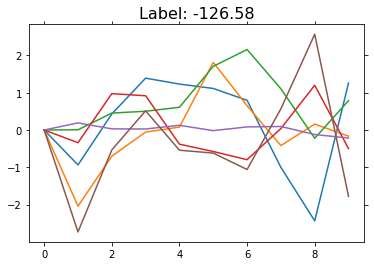

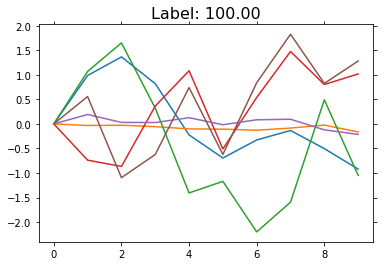

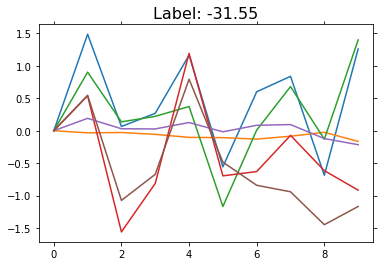

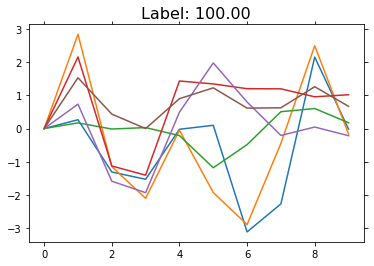

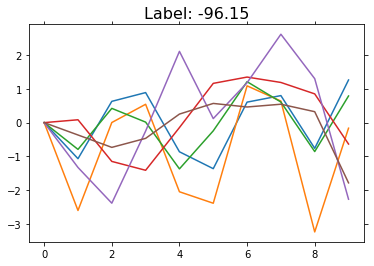

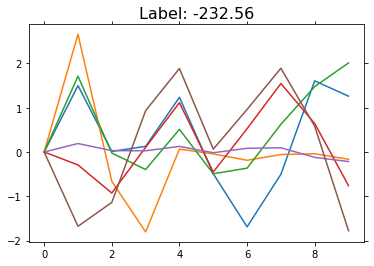

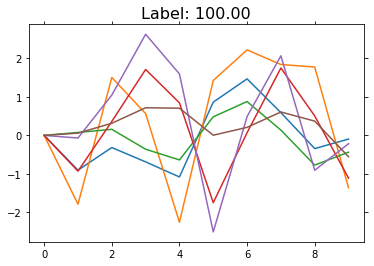

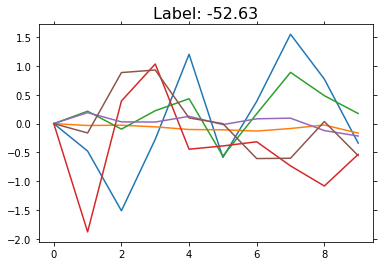

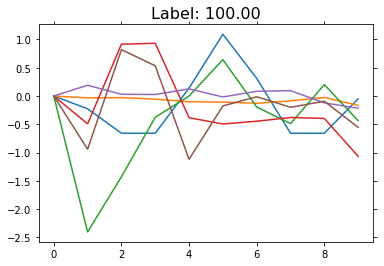

In [ ]:
dloaders.show_batch()

In [ ]:
# ## debug
# ## redefine models to add debug info, models are defined in models!
# class InceptionBlock(nn.Module):
#     def __init__(self,c_in,bottleneck=32,ks=40,nb_filters=32,residual=True,depth=6):

#         super().__init__()

#         self.residual = residual
#         self.depth = depth

#         #inception & residual layers
#         inc_mods = []
#         res_layers = []
#         res = 0
#         for d in range(depth):
#             inc_mods.append(
#                 Inception(c_in if d == 0 else nb_filters * 4, bottleneck=bottleneck if d > 0 else 0,ks=ks,
#                           nb_filters=nb_filters))
#             if self.residual and d % 3 == 2:
#                 res_layers.append(shortcut(c_in if res == 0 else nb_filters * 4, nb_filters * 4))
#                 res += 1
#             else: res_layer = res_layers.append(None)
#         self.inc_mods = nn.ModuleList(inc_mods)
#         self.res_layers = nn.ModuleList(res_layers)
#         self.act = nn.ReLU()
        
#     def forward(self, x):
#         print(f'block dtype {x.dtype}')
#         res = x
#         for d, l in enumerate(range(self.depth)):
#             x = self.inc_mods[d](x)
#             if self.residual and d % 3 == 2:
#                 res = self.res_layers[d](res)
#                 x += res
#                 res = x
#                 x = self.act(x)
#         return x


# class InceptionTime(nn.Module):
#     def __init__(self,c_in,c_out,bottleneck=32,ks=40,nb_filters=32,residual=True,depth=6):
#         super().__init__()
#         self.block = InceptionBlock(c_in,bottleneck=bottleneck,ks=ks,nb_filters=nb_filters,
#                                     residual=residual,depth=depth)
#         self.gap = nn.AdaptiveAvgPool1d(1)
#         self.fc = nn.Linear(nb_filters * 4, c_out)

#     def forward(self, x):
#         print(x.dtype)
# #         x.to(torch.float)
#         x = self.block(x)
# #         print(x.shape)
#         x = self.gap(x).squeeze(-1)
#         x = self.fc(x)
#         return x


# class InceptionTimeSgm(nn.Module):
#     '''
#     add a sigmoid layer to InceptionTime to get the ouput in a certain range
#     '''
    
#     def __init__(self, n_in, n_out):
#         super().__init__()
#         self.mod = nn.Sequential(InceptionTime(n_in, n_out), Sigmoid(-1., 1.))
        
#     def forward(self, x):
#         x = x.float()
#         print(f'InceptionTimeSgm dtype {x.dtype}')
#         return self.mod(x)

In [ ]:
# ### debug
# ## redefine models to add debug info, models are defined in models!
# class ResNetSgm(nn.Module):
#     def __init__(self,c_in, c_out):
#         super().__init__()
#         nf = 64

#         self.block1 = ResBlock(c_in, nf, ks=[7, 5, 3], act_fn='relu')
#         self.block2 = ResBlock(nf, nf * 2, ks=[7, 5, 3], act_fn='relu')
#         self.block3 = ResBlock(nf * 2, nf * 2, ks=[7, 5, 3], act_fn='relu')
#         self.gap = nn.AdaptiveAvgPool1d(1)
#         self.fc = nn.Linear(nf * 2, c_out)
#         self.sig = SigmoidRange(-1,1)

#     def forward(self, x):
#         x = self.block1(x)
#         x = self.block2(x)
#         x = self.block3(x)
#         x = self.gap(x).squeeze(-1)
#         x = self.fc(x)
#         return self.sig(x)

In [ ]:
#cuda
#leaky_loss
loss_fn = get_loss_fn('leaky_loss', alpha=0.5)

learn = Learner(dloaders, InceptionTimeSgm(6,1), loss_func=loss_fn, metrics=unweighted_profit, wd=0.03)
# learn = Learner(dloaders, InceptionTimeSgm(6,1), loss_func=F.mse_loss, metrics=unweighted_profit, wd=0.03)

In [ ]:
xb,yb = dloaders.one_batch()

encodes
maskout
cutout
timestepzero


In [ ]:
#cuda
# with torch.autograd.detect_anomaly():
learn.fit_one_cycle(10, lr_max=1e-3)

encodes
mpiw 0.5622846484184265, pcip_soft: 0.2506065368652344
encodes
cutout
mpiw 0.5349225401878357, pcip_soft: 0.25206899642944336
encodes
maskout
mpiw 0.5177307724952698, pcip_soft: 0.24813541769981384
encodes
cutout
randomcrop
timestepzero
mpiw 0.48485618829727173, pcip_soft: 0.24291814863681793
encodes
crop
mpiw 0.49379968643188477, pcip_soft: 0.2526005506515503
encodes
crop
cutout
mpiw 0.4879080355167389, pcip_soft: 0.2473709136247635
encodes
crop
maskout
mpiw 0.4644641876220703, pcip_soft: 0.24845823645591736
encodes
maskout
mpiw 0.44195085763931274, pcip_soft: 0.24666926264762878
encodes
randomcrop
mpiw 0.45376288890838623, pcip_soft: 0.2523781657218933
encodes
maskout
dimout
mpiw 0.4407285749912262, pcip_soft: 0.24077101051807404
encodes
cutout
mpiw 0.48076650500297546, pcip_soft: 0.25129616260528564
encodes
randomcrop
mpiw 0.477272629737854, pcip_soft: 0.25098323822021484
encodes
crop
cutout
mpiw 0.45479705929756165, pcip_soft: 0.24848511815071106
encodes
crop
mpiw 0.3743483

encodes
mpiw 0.08640644699335098, pcip_soft: 0.24227534234523773
encodes
dimout
crop
mpiw 0.09439404308795929, pcip_soft: 0.2500319480895996
encodes
mpiw 0.0765637680888176, pcip_soft: 0.2411361187696457
encodes
timestepzero
dimout
cutout
mpiw 0.09590700268745422, pcip_soft: 0.25516942143440247
encodes
cutout
maskout
mpiw 0.07569003105163574, pcip_soft: 0.24482905864715576
encodes
maskout
mpiw 0.05679338797926903, pcip_soft: 0.25400418043136597
encodes
mpiw 0.11140777170658112, pcip_soft: 0.2549239993095398
encodes
mpiw 0.07583821564912796, pcip_soft: 0.2481115758419037
encodes
cutout
maskout
mpiw 0.06800393760204315, pcip_soft: 0.24722757935523987
encodes
timestepzero
mpiw 0.058304306119680405, pcip_soft: 0.2437777817249298
encodes
crop
mpiw 0.06082966551184654, pcip_soft: 0.24843522906303406
encodes
dimout
maskout
mpiw 0.08304488658905029, pcip_soft: 0.24727663397789001
encodes
mpiw 0.07925155758857727, pcip_soft: 0.24160578846931458
encodes
mpiw 0.06542699038982391, pcip_soft: 0.252

encodes
randomcrop
mpiw 0.04790760204195976, pcip_soft: 0.2514418363571167
encodes
cutout
mpiw 0.03504302725195885, pcip_soft: 0.24937960505485535
encodes
dimout
mpiw 0.03514575585722923, pcip_soft: 0.24668005108833313
encodes
dimout
crop
mpiw 0.03669583424925804, pcip_soft: 0.247500479221344
encodes
maskout
mpiw 0.03366808220744133, pcip_soft: 0.24755176901817322
encodes
crop
mpiw 0.03344937786459923, pcip_soft: 0.24673672020435333
encodes
cutout
mpiw 0.033033162355422974, pcip_soft: 0.2514411211013794
encodes
mpiw 0.03156071528792381, pcip_soft: 0.24435627460479736
encodes
timestepzero
mpiw 0.02950824610888958, pcip_soft: 0.2454148232936859
encodes
randomcrop
mpiw 0.030176401138305664, pcip_soft: 0.24834071099758148
encodes
maskout
dimout
randomcrop
mpiw 0.028316916897892952, pcip_soft: 0.2470439374446869
encodes
crop
mpiw 0.027507340535521507, pcip_soft: 0.25035902857780457
encodes
cutout
randomcrop
mpiw 0.05357968434691429, pcip_soft: 0.24850322306156158
encodes
randomcrop
mpiw 0.0

encodes
dimout
mpiw 0.021785808727145195, pcip_soft: 0.24727150797843933
encodes
crop
mpiw 0.015889916568994522, pcip_soft: 0.24954581260681152
encodes
dimout
randomcrop
mpiw 0.03270890563726425, pcip_soft: 0.24878069758415222
encodes
mpiw 0.02185162715613842, pcip_soft: 0.24657924473285675
encodes
crop
mpiw 0.018008217215538025, pcip_soft: 0.24745510518550873
encodes
crop
randomcrop
mpiw 0.01660826988518238, pcip_soft: 0.2501092553138733
encodes
randomcrop
maskout
mpiw 0.01833261549472809, pcip_soft: 0.2483343780040741
encodes
mpiw 0.02158203348517418, pcip_soft: 0.24809101223945618
encodes
cutout
maskout
mpiw 0.017603648826479912, pcip_soft: 0.24457590281963348
encodes
crop
mpiw 0.01847085915505886, pcip_soft: 0.24706289172172546
encodes
maskout
dimout
mpiw 0.017782406881451607, pcip_soft: 0.24664306640625
encodes
timestepzero
dimout
mpiw 0.020821958780288696, pcip_soft: 0.24723494052886963
encodes
mpiw 0.02155749686062336, pcip_soft: 0.24918392300605774
encodes
maskout
mpiw 0.020740

encodes
crop
maskout
mpiw 0.004750688560307026, pcip_soft: 0.24991467595100403
encodes
crop
mpiw 0.005689533427357674, pcip_soft: 0.24955980479717255
encodes
timestepzero
mpiw 0.005684375297278166, pcip_soft: 0.25030988454818726
encodes
randomcrop
dimout
mpiw 0.005747634917497635, pcip_soft: 0.2501278519630432
encodes
mpiw 0.005391703452914953, pcip_soft: 0.2498776614665985
encodes
mpiw 0.005289412569254637, pcip_soft: 0.2501976788043976
encodes
dimout
cutout
mpiw 0.005365404766052961, pcip_soft: 0.24986746907234192
encodes
crop
mpiw 0.005232272669672966, pcip_soft: 0.24978888034820557
encodes
crop
mpiw 0.005009786691516638, pcip_soft: 0.24965405464172363
encodes
crop
randomcrop
mpiw 0.004962053615599871, pcip_soft: 0.24999798834323883
encodes
mpiw 0.0049512446857988834, pcip_soft: 0.24989303946495056
encodes
mpiw 0.004957850091159344, pcip_soft: 0.2501448094844818
encodes
timestepzero
mpiw 0.004685616586357355, pcip_soft: 0.249750554561615
encodes
crop
mpiw 0.00463396031409502, pcip_s

encodes
mpiw 0.0016352345701307058, pcip_soft: 0.25037649273872375
encodes
mpiw 0.0016547819832339883, pcip_soft: 0.2494671642780304
encodes
mpiw 0.0016189817106351256, pcip_soft: 0.2501547932624817
encodes
mpiw 0.0017108957981690764, pcip_soft: 0.24981722235679626
encodes
mpiw 0.001675523235462606, pcip_soft: 0.24991196393966675
encodes
mpiw 0.0016282416181638837, pcip_soft: 0.24995702505111694
encodes
mpiw 0.0016773354727774858, pcip_soft: 0.2501959204673767
encodes
mpiw 0.0016609447775408626, pcip_soft: 0.25069040060043335
encodes
mpiw 0.001651157159358263, pcip_soft: 0.2499769926071167
encodes
mpiw 0.001669056829996407, pcip_soft: 0.25067710876464844
encodes
mpiw 0.0017078402452170849, pcip_soft: 0.2498462200164795
encodes
mpiw 0.001654831343330443, pcip_soft: 0.2499171644449234
encodes
mpiw 0.0016608033329248428, pcip_soft: 0.24948731064796448
encodes
mpiw 0.0016520945355296135, pcip_soft: 0.25021225214004517
encodes
mpiw 0.0016667143208906054, pcip_soft: 0.24996858835220337
encod

encodes
timestepzero
mpiw 0.0009722159593366086, pcip_soft: 0.24975408613681793
encodes
mpiw 0.0010024064686149359, pcip_soft: 0.2504056990146637
encodes
maskout
dimout
timestepzero
mpiw 0.0010114854667335749, pcip_soft: 0.2503567934036255
encodes
dimout
crop
mpiw 0.0010083398083224893, pcip_soft: 0.24975913763046265
encodes
randomcrop
mpiw 0.0009800303960219026, pcip_soft: 0.2500377297401428
encodes
crop
dimout
mpiw 0.0009703022660687566, pcip_soft: 0.25002843141555786
encodes
mpiw 0.0009406932513229549, pcip_soft: 0.2507610321044922
encodes
mpiw 0.0009343464625999331, pcip_soft: 0.2492949366569519
encodes
randomcrop
maskout
mpiw 0.0009307007421739399, pcip_soft: 0.24990087747573853
encodes
crop
mpiw 0.0009217526530846953, pcip_soft: 0.25039055943489075
encodes
cutout
randomcrop
mpiw 0.000909630092792213, pcip_soft: 0.2507617473602295
encodes
timestepzero
mpiw 0.0009020731085911393, pcip_soft: 0.2516091763973236
encodes
maskout
mpiw 0.0009066385682672262, pcip_soft: 0.2514447569847107

mpiw 0.00045866932487115264, pcip_soft: 0.25040850043296814
encodes
timestepzero
mpiw 0.00044774761772714555, pcip_soft: 0.24968242645263672
encodes
randomcrop
mpiw 0.0004381829348858446, pcip_soft: 0.2510274052619934
encodes
randomcrop
dimout
mpiw 0.00044034511665813625, pcip_soft: 0.2502821385860443
encodes
timestepzero
maskout
mpiw 0.0004440500633791089, pcip_soft: 0.25116467475891113
encodes
maskout
dimout
mpiw 0.0004458440816961229, pcip_soft: 0.2506229877471924
encodes
timestepzero
crop
mpiw 0.0004183035052847117, pcip_soft: 0.2503076195716858
encodes
dimout
timestepzero
mpiw 0.00044090059236623347, pcip_soft: 0.25102663040161133
encodes
maskout
timestepzero
mpiw 0.000422053097281605, pcip_soft: 0.24973434209823608
encodes
randomcrop
mpiw 0.0004145406710449606, pcip_soft: 0.25041571259498596
encodes
cutout
mpiw 0.0004090816655661911, pcip_soft: 0.24927940964698792
encodes
dimout
crop
mpiw 0.0004202166455797851, pcip_soft: 0.25109314918518066
encodes
timestepzero
mpiw 0.0004137103

encodes
mpiw 0.0002898656530305743, pcip_soft: 0.24968688189983368
encodes
mpiw 0.0002849556622095406, pcip_soft: 0.2500513792037964
encodes
mpiw 0.00029125798027962446, pcip_soft: 0.2500232756137848
encodes
mpiw 0.00029641392757184803, pcip_soft: 0.2498486042022705
encodes
mpiw 0.0002864940033759922, pcip_soft: 0.25073280930519104
encodes
mpiw 0.0002914668875746429, pcip_soft: 0.25015562772750854
encodes
mpiw 0.00029608269687741995, pcip_soft: 0.25041165947914124
encodes
mpiw 0.0002900986291933805, pcip_soft: 0.2506321668624878
encodes
mpiw 0.0002873087069019675, pcip_soft: 0.2512195110321045
encodes
mpiw 0.00029199401615187526, pcip_soft: 0.2501573860645294
encodes
mpiw 0.0002883851411752403, pcip_soft: 0.25099262595176697
encodes
mpiw 0.00028953677974641323, pcip_soft: 0.24976640939712524
encodes
mpiw 0.0002927380264736712, pcip_soft: 0.24967947602272034
encodes
mpiw 0.00029293805710040033, pcip_soft: 0.24962061643600464
encodes
mpiw 0.0002830228768289089, pcip_soft: 0.2499170303344

KeyboardInterrupt: 

In [ ]:
#cuda
preds = learn.get_preds(1)

encodes


encodes
mpiw 2.5206536520272493e-06, pcip_soft: 0.2506634294986725
encodes
mpiw 2.521148417145014e-06, pcip_soft: 0.2507670223712921
encodes
mpiw 2.4816561108309543e-06, pcip_soft: 0.2504976987838745
encodes
mpiw 2.501910785213113e-06, pcip_soft: 0.2520199716091156
encodes
mpiw 2.544722519814968e-06, pcip_soft: 0.24676445126533508
encodes
mpiw 2.496803062967956e-06, pcip_soft: 0.2539163827896118
encodes
mpiw 2.415103153907694e-06, pcip_soft: 0.24887025356292725
encodes
mpiw 2.470071194693446e-06, pcip_soft: 0.25378257036209106
encodes
mpiw 2.5402987375855446e-06, pcip_soft: 0.24810117483139038
encodes
mpiw 2.509056912458618e-06, pcip_soft: 0.2518514394760132
encodes
mpiw 2.491840859875083e-06, pcip_soft: 0.25077295303344727
encodes
mpiw 2.477245288901031e-06, pcip_soft: 0.250599205493927
encodes
mpiw 2.5077315513044596e-06, pcip_soft: 0.24911896884441376
encodes
mpiw 2.4857074549800018e-06, pcip_soft: 0.2542746961116791
encodes
mpiw 2.48180003836751e-06, pcip_soft: 0.2507450580596924
e

### Discrete Timeseries

Status (5.5.):
- can pass conts and discretes
- separate tensor type_tfms
- batch tfms can be done type specific
- InceptionTimeD takes both tensors, concats them (and converts them to float)
- model training seems to work
ToDo: think about how augmentations should be applied to the discrete parts, e.g. apply them, then round, not apply them at all, define specific behaviour for the discrete augmentations, etc. ...

In [ ]:
#export
def get_discrete_config():
    '''get a simple column configuration for development'''
    x_cols_cont = [[f'x{i}_{j}' for j in range(10)] for i in [0,1,3,4]] 
    x_cols_discrete = [[f'x{i}_{j}' for j in range(10)] for i in [2,5]]
    dep = 'y0'
    n_train = 8000
    
    return x_cols_cont, x_cols_discrete, dep, n_train

In [ ]:
#int
x_cont, x_dis, dep, n_train = get_discrete_config()

In [ ]:
#int
df_main[x_dis[0]] ## still missing values 

,x2_0,x2_1,x2_2,x2_3,x2_4,x2_5,x2_6,x2_7,x2_8,x2_9
0,0.0,1.0,-1.0,-2.0,-1.0,0.0,0.0,0.0,-2.0,1.0
1,0.0,-1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0
2,-1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-2.0,0.0
3,-2.0,-1.0,2.0,2.0,0.0,3.0,0.0,-2.0,-1.0,0.0
4,-1.0,-2.0,2.0,0.0,-2.0,-1.0,1.0,-2.0,-3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
199995,1.0,0.0,1.0,1.0,-1.0,-3.0,-4.0,0.0,-4.0,1.0
199996,-1.0,0.0,4.0,1.0,-1.0,0.0,1.0,4.0,-1.0,2.0
199997,-2.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-3.0,-2.0
199998,0.0,1.0,-1.0,0.0,0.0,4.0,0.0,0.0,-1.0,0.0


In [ ]:
#int
items, n_train = df_to_items_discrete(df_main, (x_cont, x_dis), dep, n_train)

(200000, 4, 10) (200000, 2, 10)


In [ ]:
items[0]

(array([[  -7.8431373,  100.       ,   -6.497726 ,  -24.509804 ,
          -33.22259  ,  -42.735043 ,  -55.24862  ,  -56.497173 ,
          -30.674847 ,  100.       ],
        [ 100.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ],
        [ -17.301039 ,  100.       ,  -30.674847 ,  -54.945053 ,
         -227.27272  ,  -27.855154 , -400.       , -147.05882  ,
         -100.       ,  -94.33962  ],
        [   0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ]], dtype=float32),
 array([[ 0,  1, -1, -2, -1,  0,  0,  0, -2,  1],
        [ 0,  1,  0, -1, -1, -1, -1,  0, -1, -2]]),
 -56.49717514124313)

In [ ]:
#int
def db_int_get_items(df_main):
    return items_to_list(df_to_items_discrete(df_main, [x_cont, x_dis], dep, n_train)[0])

In [ ]:
#int
def get_by_idx(x, idx=0):
#     pv(f'get idx {idx} item {x}', verbose=_verbose)
    return x[idx]

In [ ]:
#int
# db_int_get_items = items
getters = [partial(get_by_idx, idx=i) for i in range(3)]

In [ ]:
#int
class ToTSIntTensor(Transform):
    def encodes(self, x):
        pv('ToTSIntTensor', _verbose)
        return TSIntTensor(x)

In [ ]:
#int
def TSIntBlock():
    return TransformBlock(type_tfms=ToTSIntTensor)

In [ ]:
##int
dblock = DataBlock(blocks = [TSBlock, TSIntBlock, FloatBlock],
    get_items=db_int_get_items, 
                   getters=getters,
                   splitter = FixedSplitter(),
                   n_inp = 2,
                   batch_tfms=RandAugment(tfms=tfms)
                  )

In [ ]:
#cuda
dblock.summary(df_main)

tfms [Zoomin: (TSTensor,object) -> encodes , Zoomout: (TSTensor,object) -> encodes , RandZoom: (TSTensor,object) -> encodes , RandTimesteps: (TSTensor,object) -> encodes , Dimout: (TSTensor,object) -> encodes , Cutout: (TSTensor,object) -> encodes , TimestepZero: (TSTensor,object) -> encodes , Crop: (TSTensor,object) -> encodes , RandomCrop: (TSTensor,object) -> encodes , Maskout: (TSTensor,object) -> encodes , YWarp: (TSTensor,object) -> encodes , YNormal: (TSTensor,object) -> encodes , YScale: (TSTensor,object) -> encodes , TimeWarp: (TSTensor,object) -> encodes , TimeNormal: (TSTensor,object) -> encodes ]
Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.6363

In [ ]:
dloaders = dblock.dataloaders(df_main, bs=16)

(200000, 4, 10) (200000, 2, 10)


In [ ]:
xc,xd,y = dloaders.one_batch()

dimout


In [ ]:
xc.shape, xd.shape, y.shape

(torch.Size([16, 4, 10]), torch.Size([16, 2, 10]), torch.Size([16, 1]))

In [ ]:
list(map(type, [xc, xd, y]))

[torchtools.data.TSTensor, torchtools.data.TSIntTensor, __main__.TensorFloat]

For using conts and discretes with a model like InceptionTime, it seems best to apply the augmentations seperately, but then concatenate both tensors and feed them as continuous input to the model.
- normalization?
- embeddings or encodings?
- concatenation at model level probably best, similar to tabular models

In [ ]:
dloaders.after_batch

Pipeline: RandAugment

In [ ]:
xc.shape, xd.shape

(torch.Size([16, 4, 10]), torch.Size([16, 2, 10]))

In [ ]:
torch.cat([xc.float(), xd.float()], dim=1).shape

torch.Size([16, 6, 10])

In [ ]:
#export
class InceptionTimeD(nn.Module):
    '''
    add a sigmoid layer to InceptionTime to get the ouput in a certain range
    '''
    
    def __init__(self, n_in, n_out):
        super().__init__()
        self.mod = nn.Sequential(InceptionTime(n_in, n_out), Sigmoid(-1., 1.))
        
    def forward(self, xc, xd):
        x = torch.cat([xc.float(), xd.float()], dim=-2)
        x = x.float()
        print(f'InceptionTimeSgm dtype {x.dtype}')
        return self.mod(x)

In [ ]:
#cuda
learn = Learner(dloaders, InceptionTimeD(6,1), loss_func=loss_fn)

In [ ]:
#cuda
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
0,0.123398,-0.020747,00:18


[2 3 4 5 6 7 8 9]
[3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[5 6 7 8 9]
[0 1 2 3 4 5 6]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[2 3 4 5 6 7 8 9]
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
[2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 2 3 4]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[4 5 6 7 8 9]
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 2 3 4 6 7 9]
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[4 5 6 

cutout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[3 4 5 6 7 8 9]
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[5 6 7 8 9]
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[2 3 4 5 6 7]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

[0 1 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[3 4 5 6 7 8 9]
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5]
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
cutout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
crop
[0 1 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[4 5 6 7 8 9]
crop
InceptionTimeSgm dtype torch.

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7 8 9]
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
[4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7 8 9]
[0 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.flo

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[4 5 6 7 8 9]
InceptionTimeSgm dtype torch

[0 1 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
[0 1 2 3 5 6 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 3 4 5 6 7 8]
[1 2 3 4 5 6]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[5 6 7 8 9]
maskout
InceptionTimeSgm dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
[0 1 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 2 3 4 5 6 7]
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
cutout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7 8 9]
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
cutout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block d

[4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
[3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
t

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

### Excursion Mnist

from fastai2.vision.all import *
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(),
                  get_y=parent_label,
                 batch_tfms=[FooTransform, RandAugment()])

source = untar_data(URLs.MNIST_TINY)
mnist.summary(source)

### QD Loss

needs to be reworked conceptually, does not compute anything reasonable

In [ ]:
#qd
def unweighted_profit_bounds(preds, y_true, threshold=0):
    return unweighted_profit(preds[:,0], y_true, threshold=threshold)

In [ ]:
#cuda
#qd
#qd_loss
loss_fn = partial(qd_loss, add=True, l=0.99)
model = InceptionTimeBounds(6,1, meanrange=(-1,1))

learn = Learner(dloaders, model, loss_func=loss_fn, wd=0.03, metrics=unweighted_profit_bounds)
# learn = Learner(dloaders, InceptionTimeSgm(6,1), loss_func=F.mse_loss, metrics=unweighted_profit, wd=0.03)